In [1]:
# data: Social_Network_Ads.csv
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
# separate i/p and o/p

x = df[['Age', 'EstimatedSalary']]

y = df['Purchased']

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Cross Validation

In [6]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state=0,
                                                   test_size= 0.25)

In [17]:
x_train.shape

(300, 2)

In [18]:
y_train.shape

(300,)

### Build the model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifier = LogisticRegression()

In [21]:
classifier.fit(x_train, y_train)

LogisticRegression()

### predict on test data

In [22]:
y_pred = classifier.predict(x_test)

In [24]:
compare = pd.DataFrame({
    'actual': y_test,
    'Predicted': y_pred
})

In [25]:
compare

,actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


### Evaluate the model

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

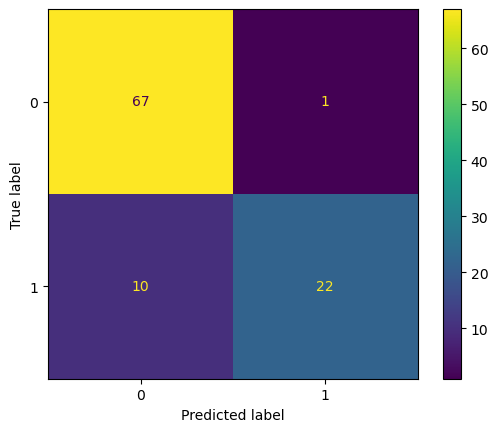

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [28]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [30]:
accuracy_score(y_test, y_pred)

0.89

### predict on new data

In [31]:
new = [[45, 50000]]

In [33]:
classifier.predict(scaler.transform(new))

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])